<a href="https://colab.research.google.com/github/waghmarerupvant4/The-Sparks-Foundation/blob/main/TSF_Task6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Rupvant Dayanand Waghmare
# Task 6 :Prediction using Decision tree algorithm

In [26]:
# Importing importatnt libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import plot_tree, export_text

In [27]:
# Uploading Iris dataset to google colab

from google.colab import files
uploaded = files.upload()

Saving Iris.csv to Iris (1).csv


In [28]:
# Reading dataset

data = pd.read_csv('Iris.csv')
data.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [29]:
# Splitting data into train and test data

train_data, test_data = train_test_split(data, test_size = 0.25, random_state = 0)

In [30]:
# Preparing data into inputs and output

inputs = list(data.columns)[1:5]
target = 'Species'
train_inputs = train_data[inputs].copy()
train_targets = train_data[target].copy()
test_inputs = test_data[inputs].copy()
test_targets = test_data[target].copy()

In [31]:
# Training Decision tree model

dtree = DecisionTreeClassifier( max_depth = 4, random_state = 0)
dtree.fit(train_inputs, train_targets)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [32]:
# Model evaluation

train_pr = dtree.predict(train_inputs)
train_pr

array(['Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-s

In [33]:

print(pd.value_counts(train_pr))
train_p = dtree.predict_proba(train_inputs)
print(train_p[1:5])

Iris-virginica     41
Iris-setosa        37
Iris-versicolor    34
dtype: int64
[[0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [34]:
dtree.score(test_inputs, test_targets)

0.9736842105263158

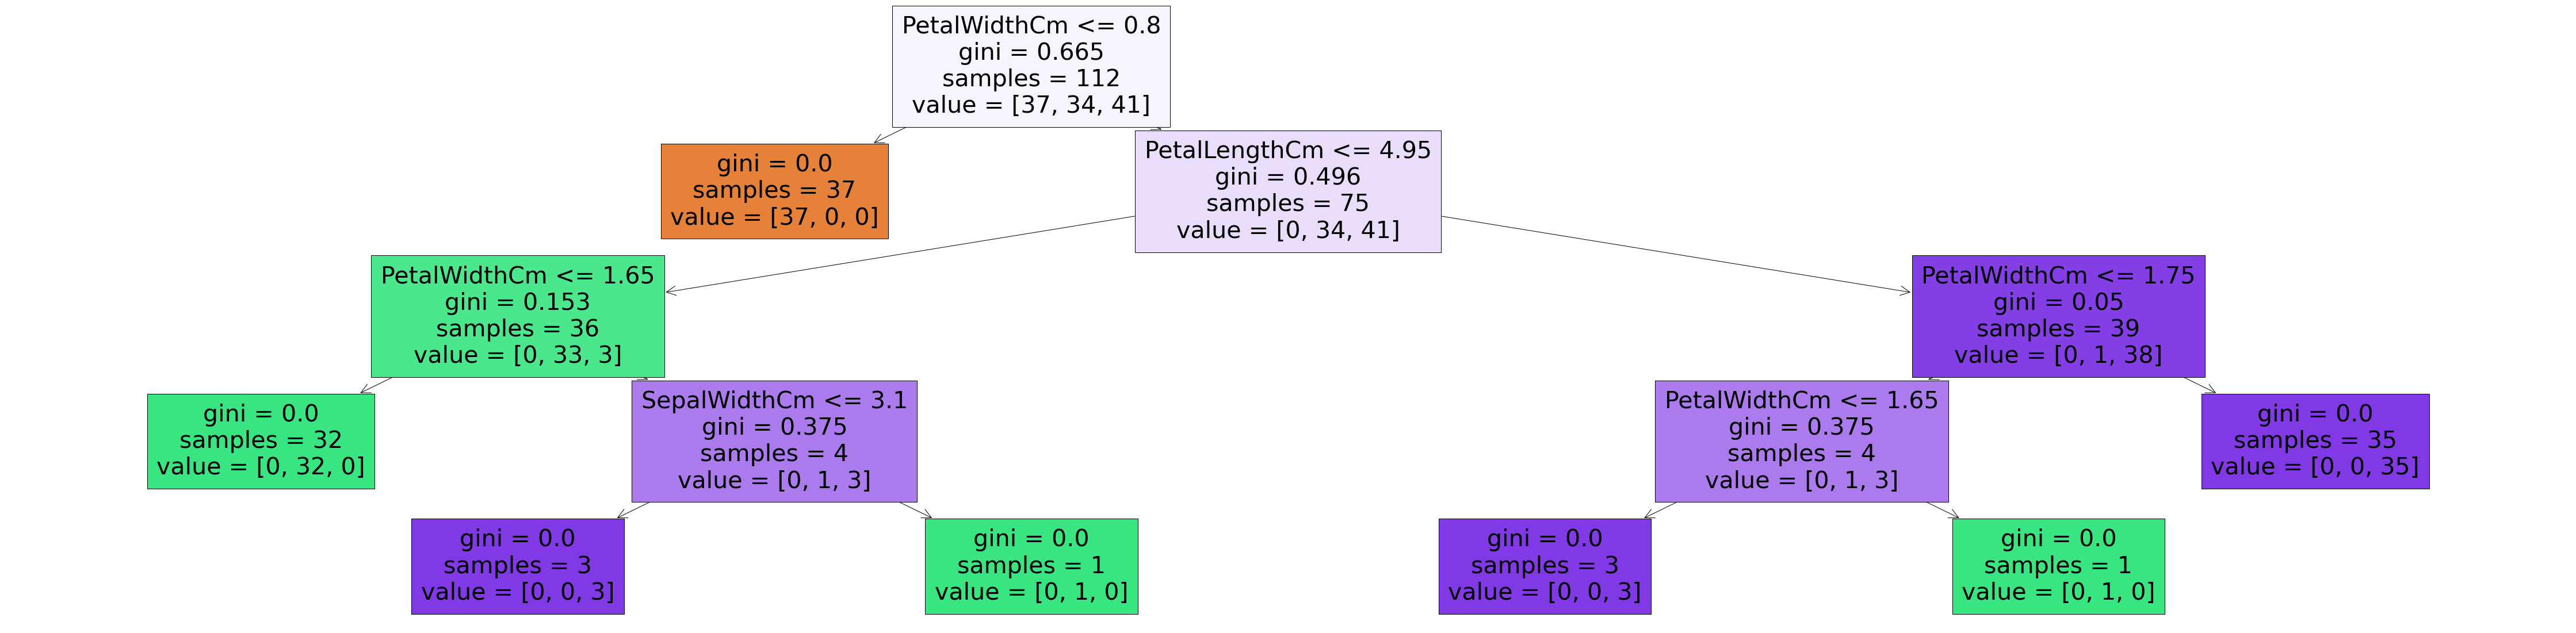

In [35]:
# Decision tree Visualization

plt.figure(figsize = (80, 20))
plot_tree(dtree, feature_names = train_inputs.columns, max_depth = 4, filled = True);

In [36]:
print(dtree.tree_.max_depth)
tree_tx = export_text(dtree, max_depth = 4, feature_names = list(train_inputs.columns))
print(tree_tx[:5000])


4
|--- PetalWidthCm <= 0.80
|   |--- class: Iris-setosa
|--- PetalWidthCm >  0.80
|   |--- PetalLengthCm <= 4.95
|   |   |--- PetalWidthCm <= 1.65
|   |   |   |--- class: Iris-versicolor
|   |   |--- PetalWidthCm >  1.65
|   |   |   |--- SepalWidthCm <= 3.10
|   |   |   |   |--- class: Iris-virginica
|   |   |   |--- SepalWidthCm >  3.10
|   |   |   |   |--- class: Iris-versicolor
|   |--- PetalLengthCm >  4.95
|   |   |--- PetalWidthCm <= 1.75
|   |   |   |--- PetalWidthCm <= 1.65
|   |   |   |   |--- class: Iris-virginica
|   |   |   |--- PetalWidthCm >  1.65
|   |   |   |   |--- class: Iris-versicolor
|   |   |--- PetalWidthCm >  1.75
|   |   |   |--- class: Iris-virginica



In [37]:
imp_df = pd.DataFrame({
    'feature' : train_inputs.columns,
    'importance' : dtree.feature_importances_
}).sort_values('importance', ascending = False)
imp_df

,feature,importance
3,PetalWidthCm,0.580576
2,PetalLengthCm,0.399275
1,SepalWidthCm,0.020149
0,SepalLengthCm,0.000000


In [38]:
# Making predictions

def predict_input(dtree, single_input):
    X_input = pd.DataFrame([single_input])
    pred = dtree.predict(X_input)[0]
    prob = dtree.predict_proba(X_input)[0][list(dtree.classes_).index(pred)]
    return pred, prob

In [39]:
# testing for some random values

new_input = {'SepalLengthCm' : 4.2,
             'SepalWidthCm' : 3.9,
             'PetalLengthCm': 1.1,
             'PetalWidthCm' : 0.5}

In [40]:
predict_input(dtree, new_input)

('Iris-setosa', 1.0)